In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import imutils

In [2]:
def displayColorImage(image, title):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), interpolation="nearest")
    plt.title(title)
    plt.show()

In [3]:
def displayGrayScaleImage(image, title):
    plt.imshow(image, cmap='gray', vmin = 0.0, vmax = 255.0)
    plt.title(title)
    plt.show()

In [4]:
def recognizeShape(image):
    displayColorImage(image, "Original Image")
    gray = cv2.cvtColor(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cv2.COLOR_BGR2GRAY)
    displayGrayScaleImage(gray, "Gray Scale Image")
    ct = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    ct = imutils.grab_contours(ct)
    cl = image.copy()
    cv2.drawContours(cl, ct, -1, (0,0,255),5)
    displayColorImage(cl, "Image with contours")
    
    for(i, c) in enumerate(ct):
        shape=""
        perimeter = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.01 * perimeter, True)
        print("lenth of approx:{} ".format(str(len(approx))))
        if(len(approx)==4):
            shape="rectangle"
        (x,y,w,h) = cv2.boundingRect(c)
        cv2.putText(cl, shape,(x,y+50), cv2.FONT_HERSHEY_SIMPLEX, 2.0, (0,0,255),5)
        #cv2.rectangle(cl, (x,y), (x+w, y+h),(0,255,0),3)
        
    displayColorImage(cl, "with contour approximation")
        

### Draw image

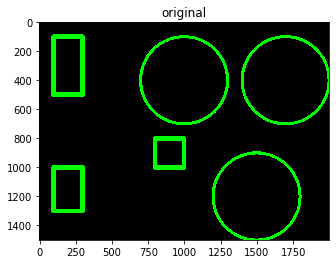

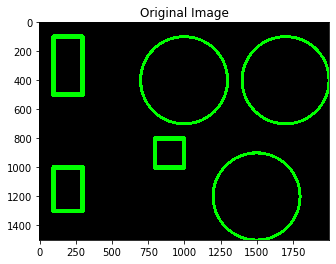

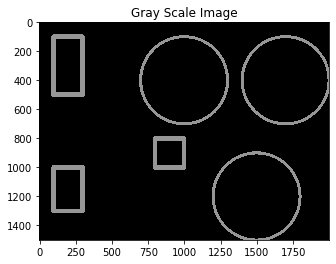

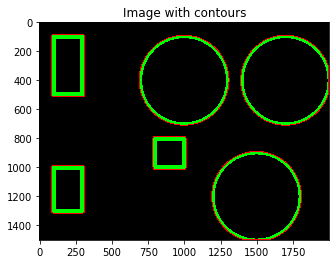

lenth of approx:4 
lenth of approx:15 
lenth of approx:4 
lenth of approx:14 
lenth of approx:16 
lenth of approx:4 


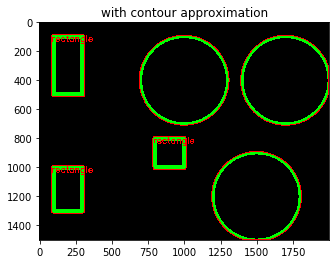

In [5]:
image = np.zeros((1500,2000,3), dtype="uint8")
cv2.rectangle(image, (100,100), (300,500), (0,255,0), 30)
cv2.rectangle(image, (800,800), (1000,1000), (0,255,0), 30)
#cv2.rectangle(image, (100,1000), (300,500), (0,255,0), 30)
cv2.rectangle(image, (100,1000), (300,1300), (0,255,0), 30)
cv2.circle(image, (1000,400), 300, (0,255,0), 20)
cv2.circle(image, (1500,1200), 300, (0,255,0), 20)
cv2.circle(image, (1700,400), 300, (0,255,0), 20)

displayColorImage(image, "original")
recognizeShape(image)

In [10]:
def sortAndrecognizeShape(image):
    displayColorImage(image, "Original Image")
    gray = cv2.cvtColor(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cv2.COLOR_BGR2GRAY)
    displayGrayScaleImage(gray, "Gray Scale Image")
    ct = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    ct = imutils.grab_contours(ct)
    ct = sorted(ct, key=cv2.contourArea, reverse=True)[:3]
    cl = image.copy()
    cv2.drawContours(cl, ct, -1, (255,0,0),5)
    displayColorImage(cl, "Image with contours")
    
    for(i, c) in enumerate(ct):
        shape=""
        perimeter = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.01 * perimeter, True)
        print("lenth of approx:{} ".format(str(len(approx))))
        if(len(approx)==4):
            shape="rectangle"
        (x,y,w,h) = cv2.boundingRect(c)
        #cv2.putText(cl, shape,(x,y+50), cv2.FONT_HERSHEY_SIMPLEX, 2.0, (0,0,255),5)
        cv2.rectangle(cl, (x,y), (x+w, y+h),(0,255,0),3)
        
    displayColorImage(cl, "with contour approximation")

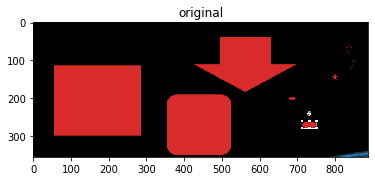

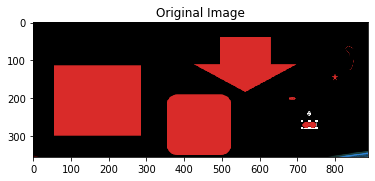

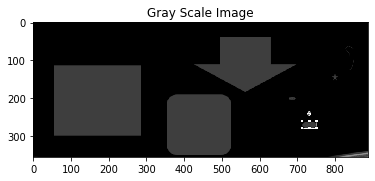

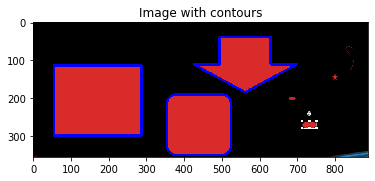

lenth of approx:4 
lenth of approx:8 
lenth of approx:7 


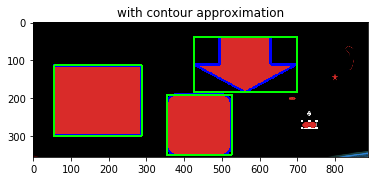

In [11]:
image = cv2.imread("./data/contoursorting.png")
displayColorImage(image, "original")
sortAndrecognizeShape(image)